# PCA using Cats and Dogs image dataset

In [2]:
import numpy as np
from scipy.io import loadmat
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')

%matplotlib notebook

Load "Cats and Dogs" data set

- contains 198 images of cats and dogs 
- First 99 images are cats, last 99 images are dogs
- each image is 64x64 pixel image

Store the data as a matrix $ \boldsymbol{X} \in \mathbb{R}^{n \mathrm{x} m} $ where $n$ is the number of pixels in each image, and $m$ is the number of images in the data set 

$ \boldsymbol{X} = [ \boldsymbol{x}^1 | ... | \boldsymbol{x}^m ] $

In [2]:
X = loadmat("data/datamatrix.mat")['Y']
n,m = X.shape

print(X.shape) 

(4096, 198)


Start by centering the data (subtracting the mean over all 198 samples)

In [3]:
Xc = X - np.vstack(np.mean(X, 1))

The goal of PCA is to determine a "best basis" that describes the greatest degree of variance in the dataset. Because there are only 198 samples, the rank of our centered matrix is 197 (lost a degree of freedom due to centering). So although each sample has 4096 elements, the information in the data lives on a much smaller subspace. 

In [4]:
rank = np.linalg.matrix_rank(Xc)
print("Rank of centered matrix: " + str(rank)) 

Rank of centered matrix: 197


# Orthogonal Projection 

Given two vectors in $\mathbb{R}^n$, $\boldsymbol{x}$ and $\boldsymbol{u}$, we often want to find the coordinates of the vector that points in the direction of $\boldsymbol{u}$ that provides the closest approximation to $\boldsymbol{x}$.  

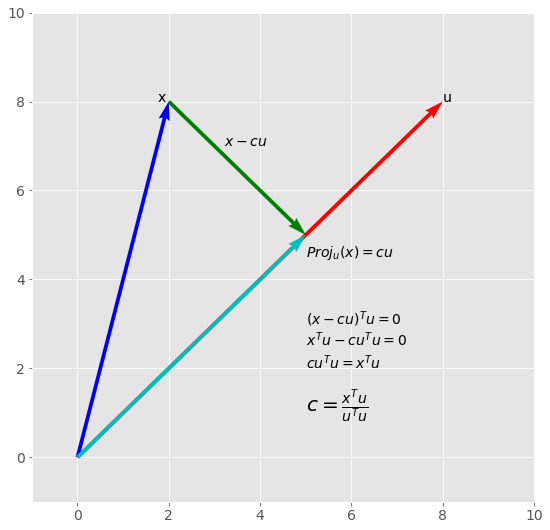

In [50]:
plt.figure(figsize=(9, 9))
matplotlib.rcParams.update({'font.size':14})

soa = np.array([[0, 0, 8, 8], [0, 0, 2, 8], [2, 8, 3, -3], [0, 0, 5, 5]])
X, Y, U, V = zip(*soa)

ax = plt.gca()
ax.quiver(X, Y, U, V, angles='xy', scale_units='xy', scale=1, color=['r','b','g','c'])
ax.set_xlim([-1, 10])
ax.set_ylim([-1, 10])

ax.annotate('u', xy=(8,8))
ax.annotate('x', xy=(1.75,8))
ax.annotate(r'$x - cu$', xy=(3.2, 7))
ax.annotate(r'$Proj_u(x) = cu$', xy=(5,4.5))

ax.annotate(r'$ (x-cu)^T u = 0 $', xy=(5, 3))
ax.annotate(r'$ x^Tu - cu^T u = 0 $', xy=(5, 2.5))
ax.annotate(r'$ cu^T u = x^Tu $', xy=(5, 2))
ax.annotate(r'$ c = \frac{x^Tu}{u^Tu}$', xy=(5, 1), size='x-large')

plt.draw()
plt.show()

# PCA

To determine the best set of basis vectors for the data, we want to find the basis vector that points in the direction of maximum variance in the data. Consider the one dimensional subspace that represents the projection of all of the data points onto the normalized vector $\boldsymbol{u}_1$, ($\boldsymbol{u}_1^T \boldsymbol{u}_1 = 1$). The variance of the set of points projected onto this subspace is given by 

$\frac{1}{m} \sum_{k=1}^{m} \{ \boldsymbol{u}_1^T \boldsymbol{x}_k - \boldsymbol{u}_1^T \hat{\boldsymbol{x}} \}^2 $ where $\hat{\boldsymbol{x}} = \frac{1}{m} \sum_{k=1}^{m} \boldsymbol{x}_k $ is the sample average 

Defining a covariance matrix $C$ in terms of the centered matrix, $\bar{\boldsymbol{X}} = \boldsymbol{X} - \hat{\boldsymbol{x}}$, as $\boldsymbol{C} = \frac{1}{m} \bar{\boldsymbol{X}} \bar{\boldsymbol{X}}^T $

$\frac{1}{m} \sum_{k=1}^{m} \{ \boldsymbol{u}_1^T \boldsymbol{x}_k - \boldsymbol{u}_1^T \hat{\boldsymbol{x}} \}^2   = \boldsymbol{u}_1^T \boldsymbol{C} \boldsymbol{u}_1 $

We want to choose the basis vector $\boldsymbol{u}_1$ such that the variance of the projected points is maximized. So we need to maximize $\boldsymbol{u}_1^T \boldsymbol{C} \boldsymbol{u}_1 $

To solve this optimization problem as an unconstrained maximization, we introduce a lagrange multiplier $\lambda_1$ that prevents $\boldsymbol{u}_1^T \boldsymbol{u}_1$ from approaching infinity: 

Maximize $ \boldsymbol{u}_1^T \boldsymbol{C} \boldsymbol{u}_1 + \lambda_1(1 - \boldsymbol{u}_1^T \boldsymbol{u}_1) $ with respect to $\boldsymbol{u}_1$ 

$\frac{\mathrm{d}}{\mathrm{d}\boldsymbol{u}_1} [\boldsymbol{u}_1^T \boldsymbol{C} \boldsymbol{u}_1 + \lambda_1(1 - \boldsymbol{u}_1^T \boldsymbol{u}_1)] = 0 $ 

$ 2 \boldsymbol{C}\boldsymbol{u}_1 - 2\lambda_1\boldsymbol{u}_1 = 0 $

And ultimately we get that the solution is an eigenvalue problem! 

$ \boldsymbol{C}\boldsymbol{u}_1 = \lambda_1\boldsymbol{u}_1 $ 

Fortunately, the matrix $\boldsymbol{C} \in \mathbb{R}^{n x n}$ is a real symmetric matrix which guarantees a few important details: 
- The matrix is positive semi definite (all eigenvalues are non-zero) 
- The set of eigenvectors are orthogonal 

In [5]:
# calculate C 
C = Xc@Xc.T / m 
print(C.shape)

(4096, 4096)


In [6]:
# calculate the eigenvectors and eigenvalues of C 
# This step may take a while, and there's a better way to do this using SVD
eVals, eVecs = np.linalg.eig(C)

In [7]:
# define change of basis matrix to project to basis composed of eigenvectors 
U = np.real(eVecs)

In [8]:
# IX = UX_ 
# X_ = U.T X  Because U is orthonormal 
X_projected = U.T @ Xc

<IPython.core.display.Javascript object>


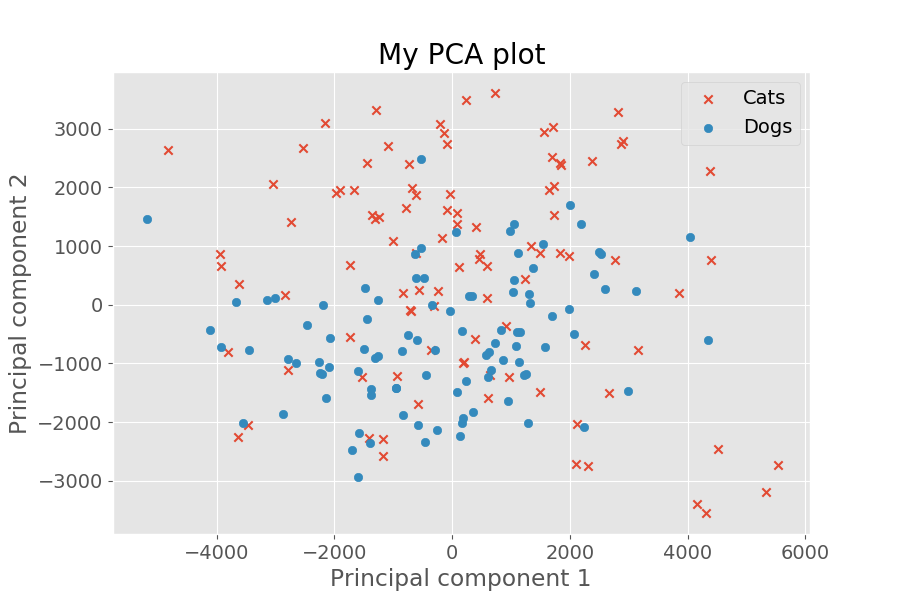

In [16]:
pc1 = X_projected[0, :]
pc2 = X_projected[1, :]

plt.figure(figsize=(9, 6))
matplotlib.rcParams.update({'font.size':14})

plt.scatter(pc1[:99], pc2[:99], label='Cats', marker='x')
plt.scatter(pc1[99:], pc2[99:], label='Dogs', marker='o')
plt.legend()
plt.xlabel("Principal component 1")
plt.ylabel("Principal component 2")
plt.title("My PCA plot")
plt.show()

In [10]:
#Confirm results with sklearn 
from sklearn.decomposition import PCA as sklearnPCA
sklearn_pca = sklearnPCA(n_components=2)
X_sklearn = sklearn_pca.fit_transform(Xc.T)

<IPython.core.display.Javascript object>


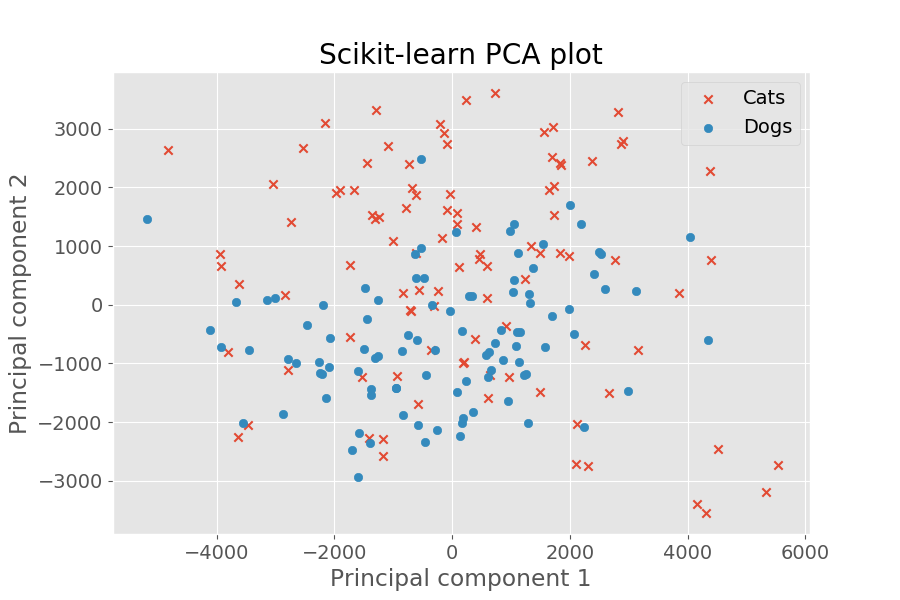

In [17]:
a1 = X_sklearn[:, 0]
a2 = X_sklearn[:, 1]

plt.figure(figsize=(9, 6))

plt.scatter(pc1[:99], pc2[:99], label='Cats', marker='x')
plt.scatter(pc1[99:], pc2[99:], label='Dogs', marker='o')
plt.legend()
plt.xlabel("Principal component 1")
plt.ylabel("Principal component 2")
plt.title("Scikit-learn PCA plot")
matplotlib.rcParams.update({'font.size':14})
plt.show()

Use the magnitude of the eigenvalues to determine the number of principal components that captures 95% of the variance on the data 

<IPython.core.display.Javascript object>


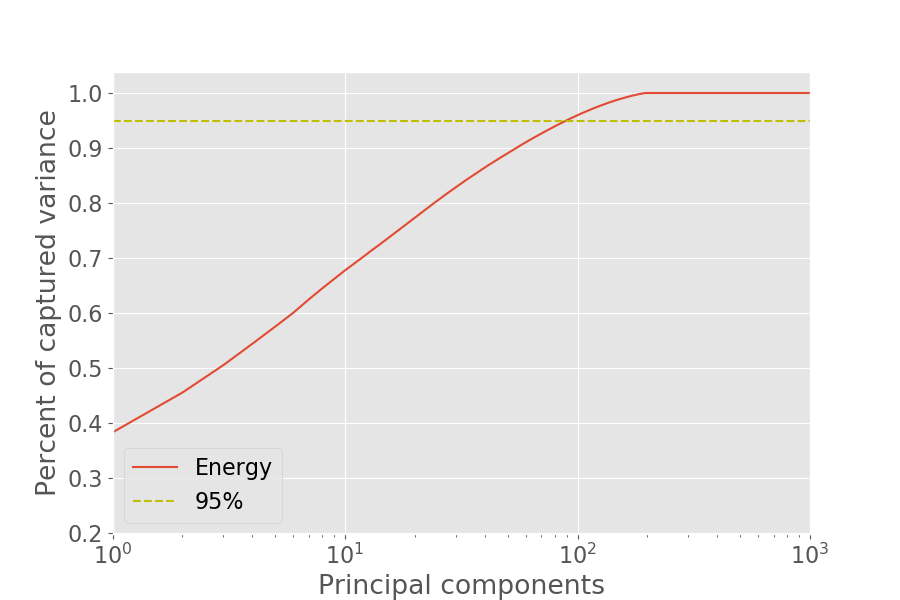

In [18]:
eVals = np.real(eVals)
eVals[rank:] = 0
energy = np.cumsum(np.real(eVals) / sum(np.real(eVals)))

plt.figure(figsize=(9, 6))
matplotlib.rcParams.update({'font.size':16})

plt.plot(energy, label='Energy')
plt.axhline(.95, linestyle='--', color= 'y', label='95%')
plt.ylabel('Percent of captured variance')
plt.xlabel('Principal components')
plt.xscale('log')
plt.xlim([1, 1000])

plt.legend()
plt.show()

In [13]:
Dim95 = np.arange(1, len(eVals)+1)[energy>=.95][0]
print("{} principal components are needed to capture 95% of variance".format(Dim95))

91 principal components are needed to capture 95% of variance


<IPython.core.display.Javascript object>


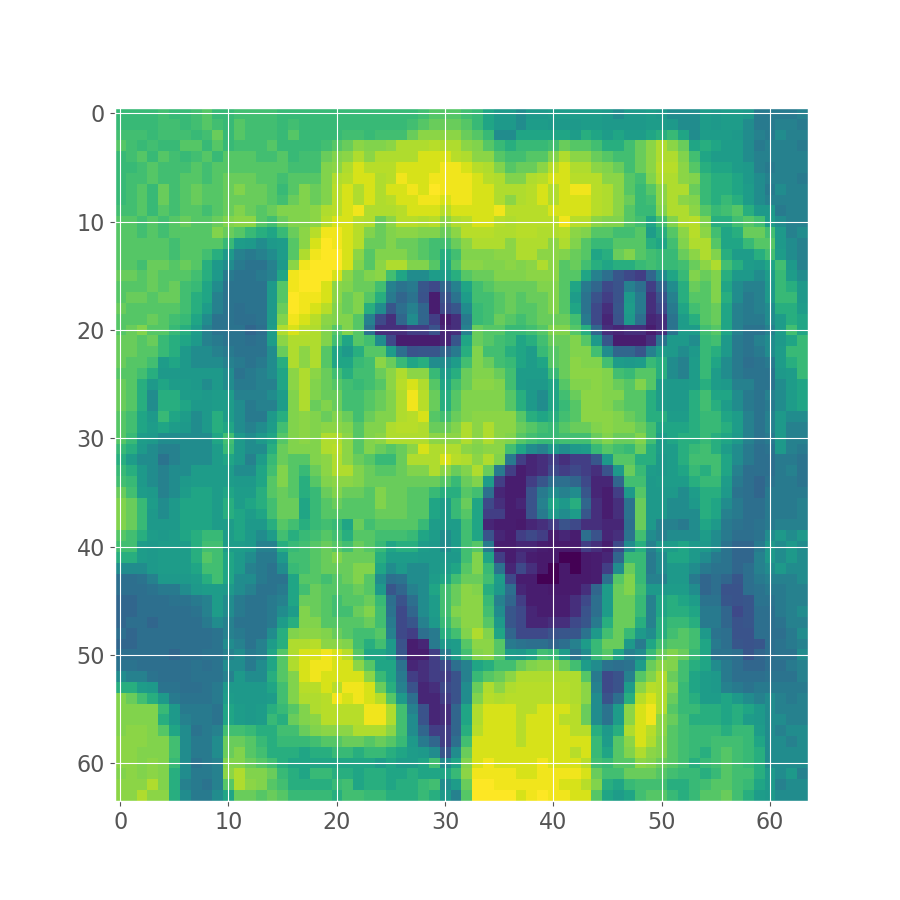

In [20]:
plt.figure(figsize=(9, 9))
plt.imshow(np.reshape(X[:, 121], [64, 64]).T)
plt.show()